In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.7
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)


In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [2]:
IMAGE_SIZE = [224, 224]
train_path = 'C:\\Users\\HOME\\Desktop\\train\*'
valid_path = 'C:\\Users\\HOME\\Desktop\\validation\*'

In [3]:
xception = Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
for layer in xception.layers:
    layer.trainable = False

In [5]:

folders = glob(train_path)

In [6]:
folders

['C:\\Users\\HOME\\Desktop\\train\\Alzeimer',
 'C:\\Users\\HOME\\Desktop\\train\\Cognitive Impairment',
 'C:\\Users\\HOME\\Desktop\\train\\pituitary',
 'C:\\Users\\HOME\\Desktop\\train\\Stroke']

In [7]:
x = Flatten()(xception.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=xception.input, outputs=prediction)

In [9]:
prediction

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'dense')>

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [11]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True
                                  )

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 244 images belonging to 4 classes.


In [14]:
test_set = test_datagen.flow_from_directory('validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',shuffle=False)

Found 47 images belonging to 4 classes.


In [15]:
test_set.filenames

['Alzeimer\\ADNI_002_S_4521_MR_Axial_T2-Star__br_raw_20160324122521837_22_S402609_I662501.jpg',
 'Alzeimer\\ADNI_006_S_4960_MR_Axial_T2-Star__br_raw_20151116142521022_22_S308848_I554365.jpg',
 'Alzeimer\\ADNI_012_S_4094_MR_Axial_T2_STAR__br_raw_20170911112516152_22_S606978_I902073.jpg',
 'Alzeimer\\ADNI_013_S_4395_MR_AXIAL_T2__STAR_br_raw_20160408152851491_22_S413787_I675059.jpg',
 'Alzeimer\\ADNI_024_S_4169_MR_AXIAL_T2_STAR__br_raw_20150824183510226_22_S269703_I506435.jpg',
 'Alzeimer\\ADNI_035_S_4114_MR_Axial_T2_STAR__br_raw_20180927135557122_22_S730896_I1053100.jpg',
 'Alzeimer\\ADNI_037_S_4214_MR_Axial_T2_TSE_with_Fat_Sat__br_raw_20151016131541571_22_S285609_I527059.jpg',
 'Alzeimer\\ADNI_037_S_4302_MR_AX_T2_STAR_br_raw_20151202134651542_22_S321070_I568501.jpg',
 'Alzeimer\\ADNI_052_S_4626_MR_Axial_T2_Star__br_raw_20150416145050678_22_S255859_I487186.jpg',
 'Alzeimer\\ADNI_057_S_4888_MR_Axial_T2_Star__br_raw_20160810162606039_22_S490606_I765318.jpg',
 'Cognitive Impairment\\ADNI_03

In [16]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\HOME\AppData\Local\Temp\ipykernel_43728\2336048694.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/30
8/8 [==============================] - 23s 973ms/step - loss: 3.1517 - accuracy: 0.5533 - val_loss: 1.3531 - val_accuracy: 0.7872
Epoch 2/30
8/8 [==============================] - 3s 315ms/step - loss: 0.6187 - accuracy: 0.8402 - val_loss: 1.5368 - val_accuracy: 0.7234
Epoch 3/30
8/8 [==============================] - 3s 315ms/step - loss: 0.9374 - accuracy: 0.8279 - val_loss: 1.7355 - val_accuracy: 0.7021
Epoch 4/30
8/8 [==============================] - 3s 315ms/step - loss: 0.6528 - accuracy: 0.8607 - val_loss: 1.0522 - val_accuracy: 0.8936
Epoch 5/30
8/8 [==============================] - 3s 311ms/step - loss: 0.4945 - accuracy: 0.8934 - val_loss: 1.1602 - val_accuracy: 0.9149
Epoch 6/30
8/8 [==============================] - 3s 309ms/step - loss: 0.6646 - accuracy: 0.8443 - val_loss: 1.2045 - val_accuracy: 0.9362
Epoch 7/30
8/8 [==============================] - 3s 315ms/step - loss: 0.3833 - accuracy: 0.8975 - val_loss: 1.7411 - val_accuracy: 0.7872
Epoch 8/30
8/8 [===

In [17]:
import matplotlib.pyplot as plt

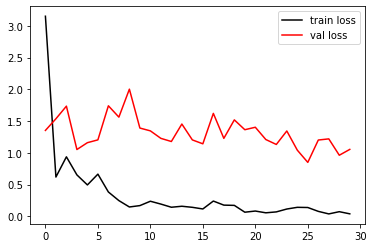

<Figure size 432x288 with 0 Axes>

In [18]:
plt.plot(r.history['loss'], label='train loss',color="black")
plt.plot(r.history['val_loss'], label='val loss',color="red")
plt.legend()
plt.show()
plt.savefig('LossVal_loss')




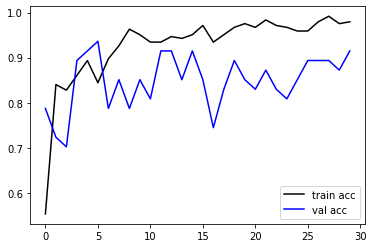

<Figure size 432x288 with 0 Axes>

In [19]:
plt.plot(r.history['accuracy'], label='train acc',color="black")
plt.plot(r.history['val_accuracy'], label='val acc',color="blue")
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:

from tensorflow.keras.models import load_model
model.save('model_xception.h5')


In [21]:
model=load_model('model_xception.h5')

In [22]:
y_pred = model.predict(test_set)
y_pred

2/2 [==============================] - 2s 361ms/step


array([[5.05352912e-11, 1.00000000e+00, 1.41811222e-16, 4.65870727e-38],
       [8.12904596e-01, 1.87095404e-01, 8.51871708e-15, 8.69984060e-28],
       [9.99978065e-01, 2.18975365e-05, 6.58269893e-14, 8.68416541e-35],
       [9.99947429e-01, 5.25092655e-05, 1.54508049e-20, 3.08647992e-28],
       [9.99927640e-01, 7.24051206e-05, 2.10849049e-14, 1.04578726e-29],
       [9.94661272e-01, 5.33871632e-03, 2.12529316e-21, 1.03796306e-24],
       [9.65391934e-01, 3.46081331e-02, 4.19801166e-10, 1.52665265e-28],
       [1.10115650e-06, 9.99998927e-01, 2.08071803e-18, 3.25000490e-30],
       [8.95897001e-02, 9.10410285e-01, 1.10095410e-22, 3.14770274e-21],
       [9.99976277e-01, 2.37531240e-05, 5.51659158e-20, 1.07083056e-23],
       [7.78401569e-02, 9.22159851e-01, 7.27222298e-21, 4.96308545e-36],
       [1.53026935e-02, 9.84584391e-01, 1.12883579e-04, 3.72838592e-18],
       [3.68500175e-03, 9.96315062e-01, 6.28767190e-20, 2.18425987e-31],
       [1.32131914e-04, 9.99867797e-01, 6.67450550e

In [23]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3], dtype=int64)

In [24]:
import os
path ='validation'
Diseases_types=os.listdir(path)

In [25]:
diseases = []
for i in Diseases_types:
  all_images = os.listdir(path + '/' +i)

  for j in all_images :
    diseases.append((i))
    print (diseases)

['Alzeimer']
['Alzeimer', 'Alzeimer']
['Alzeimer', 'Alzeimer', 'Alzeimer']
['Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer']
['Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer']
['Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer']
['Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer']
['Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer']
['Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer']
['Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer']
['Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Cognitive Impairment']
['Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Cognitive Impairment', 'Cognitive Impairment']
['Alzeimer', 'Al

In [26]:
diseases

['Alzeimer',
 'Alzeimer',
 'Alzeimer',
 'Alzeimer',
 'Alzeimer',
 'Alzeimer',
 'Alzeimer',
 'Alzeimer',
 'Alzeimer',
 'Alzeimer',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'Cognitive Impairment',
 'pituitary',
 'pituitary',
 'pituitary',
 'pituitary',
 'pituitary',
 'pituitary',
 'pituitary',
 'pituitary',
 'pituitary',
 'pituitary',
 'Stroke',
 'Stroke',
 'Stroke',
 'Stroke',
 'Stroke',
 'Stroke',
 'Stroke',
 'Stroke',
 'Stroke',
 'Stroke']

In [27]:
from sklearn.preprocessing import LabelEncoder
diseases = np.array(diseases)
diseases.reshape(47,-1)
y_labelencoder = LabelEncoder()



In [28]:
diseases

array(['Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer',
       'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer', 'Alzeimer',
       'Cognitive Impairment', 'Cognitive Impairment',
       'Cognitive Impairment', 'Cognitive Impairment',
       'Cognitive Impairment', 'Cognitive Impairment',
       'Cognitive Impairment', 'Cognitive Impairment',
       'Cognitive Impairment', 'Cognitive Impairment',
       'Cognitive Impairment', 'Cognitive Impairment',
       'Cognitive Impairment', 'Cognitive Impairment',
       'Cognitive Impairment', 'Cognitive Impairment',
       'Cognitive Impairment', 'pituitary', 'pituitary', 'pituitary',
       'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary',
       'pituitary', 'pituitary', 'Stroke', 'Stroke', 'Stroke', 'Stroke',
       'Stroke', 'Stroke', 'Stroke', 'Stroke', 'Stroke', 'Stroke'],
      dtype='<U20')

In [29]:
y_test = y_labelencoder.fit_transform (diseases)
y_test = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 7,  3,  0,  0],
       [ 1, 16,  0,  0],
       [ 0,  0, 10,  0],
       [ 0,  0,  0, 10]], dtype=int64)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.84      0.94      0.89        17
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10

    accuracy                           0.91        47
   macro avg       0.93      0.91      0.92        47
weighted avg       0.92      0.91      0.91        47



In [32]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9223140495867769

In [33]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred,average='micro')

0.9148936170212766

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9148936170212766

In [35]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred,average='micro')

0.9148936170212766

In [36]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred,average='micro')

0.9148936170212766

In [37]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [38]:
from sklearn.metrics import confusion_matrix
import pandas as pd
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['Alzeimer','Cognitive Impairment','pituitary','Stroke'], 
                     columns = ['Alzeimer','Cognitive Impairment','pituitary','Stroke'])

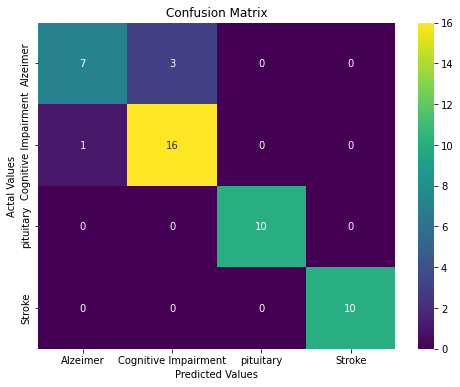

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
custom_cmap = sns.color_palette("viridis", as_cmap=True)
sns.heatmap(cm_df, annot=True, cmap=custom_cmap)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [40]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [41]:
img=image.load_img('test_img.jpg',target_size=(224,224))

In [42]:
x=image.img_to_array(img)
x

array([[[16., 16., 16.],
        [16., 16., 16.],
        [16., 16., 16.],
        ...,
        [16., 16., 16.],
        [16., 16., 16.],
        [16., 16., 16.]],

       [[16., 16., 16.],
        [16., 16., 16.],
        [16., 16., 16.],
        ...,
        [16., 16., 16.],
        [16., 16., 16.],
        [16., 16., 16.]],

       [[16., 16., 16.],
        [16., 16., 16.],
        [16., 16., 16.],
        ...,
        [16., 16., 16.],
        [16., 16., 16.],
        [16., 16., 16.]],

       ...,

       [[16., 16., 16.],
        [16., 16., 16.],
        [16., 16., 16.],
        ...,
        [16., 16., 16.],
        [16., 16., 16.],
        [16., 16., 16.]],

       [[16., 16., 16.],
        [16., 16., 16.],
        [16., 16., 16.],
        ...,
        [16., 16., 16.],
        [16., 16., 16.],
        [16., 16., 16.]],

       [[16., 16., 16.],
        [16., 16., 16.],
        [16., 16., 16.],
        ...,
        [15., 15., 15.],
        [16., 16., 16.],
        [16., 16., 16.]]

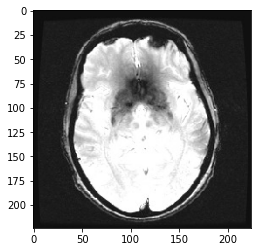

In [43]:
from matplotlib.pyplot import imshow
imshow(img)

In [44]:
x=x/255

In [45]:
x


array([[[0.0627451 , 0.0627451 , 0.0627451 ],
        [0.0627451 , 0.0627451 , 0.0627451 ],
        [0.0627451 , 0.0627451 , 0.0627451 ],
        ...,
        [0.0627451 , 0.0627451 , 0.0627451 ],
        [0.0627451 , 0.0627451 , 0.0627451 ],
        [0.0627451 , 0.0627451 , 0.0627451 ]],

       [[0.0627451 , 0.0627451 , 0.0627451 ],
        [0.0627451 , 0.0627451 , 0.0627451 ],
        [0.0627451 , 0.0627451 , 0.0627451 ],
        ...,
        [0.0627451 , 0.0627451 , 0.0627451 ],
        [0.0627451 , 0.0627451 , 0.0627451 ],
        [0.0627451 , 0.0627451 , 0.0627451 ]],

       [[0.0627451 , 0.0627451 , 0.0627451 ],
        [0.0627451 , 0.0627451 , 0.0627451 ],
        [0.0627451 , 0.0627451 , 0.0627451 ],
        ...,
        [0.0627451 , 0.0627451 , 0.0627451 ],
        [0.0627451 , 0.0627451 , 0.0627451 ],
        [0.0627451 , 0.0627451 , 0.0627451 ]],

       ...,

       [[0.0627451 , 0.0627451 , 0.0627451 ],
        [0.0627451 , 0.0627451 , 0.0627451 ],
        [0.0627451 , 0

In [46]:
import cv2
x = cv2.resize(x,(224,224)) 
x = x.reshape(1,224,224,3) 

In [47]:
x.shape

(1, 224, 224, 3)

In [48]:
model.predict(x)

1/1 [==============================] - 1s 1s/step


array([[1.0000000e+00, 1.5454185e-12, 3.6128394e-12, 2.3399205e-22]],
      dtype=float32)

In [49]:
a=model.predict(x)

1/1 [==============================] - 0s 23ms/step


In [50]:
a.argmax()

0